# Summary
In this notebook we load some names and see how they look like, their lengths, etc.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import os
os.chdir('../')

In [4]:
with open("./data/raw/text/training_names_processed.txt", "r") as file:
    training_names_txt = [line.strip() for line in file]

with open("./data/raw/text/validation_names_processed.txt", "r") as file:
    validation_names_txt = [line.strip() for line in file]

print('Data Size:')
print('Training: ', len(training_names_txt))
print('Validation:', len(validation_names_txt))

print(training_names_txt[:10])

Data Size:
Training:  7892459
Validation: 961726
['', 'syampavith', 'നിലാമ്', 'al ourabi', 'subodh kumar', 'വിനീതാമോൾ ജോസ്', 'prajeesh shsi', 'yihshing', 'ഷെരിഫ് ബി', 'naseema kadakkot']


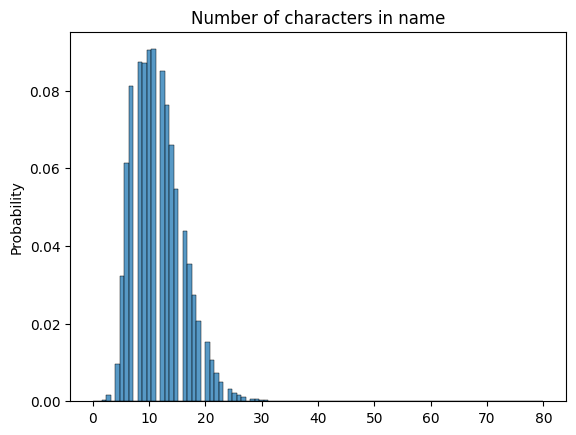

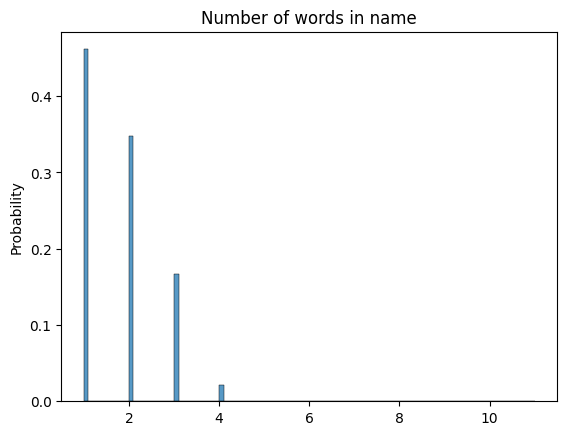

In [5]:
lengths = [len(x) for x in training_names_txt]
sns.histplot(pd.Series(lengths), bins = 100, stat='probability')
plt.title("Number of characters in name")
plt.show()

num_words = [len(x.split(' ')) for x in training_names_txt]
sns.histplot(pd.Series(num_words), stat='probability', bins = 100)
plt.title("Number of words in name")
plt.show()



In [6]:
training_names_np = np.array(training_names_txt)
num_words = np.array(num_words)
training_names_np[num_words>2]

array(['നീതു മറിയം വർഗീസ്', 'സാബു വി ജി', 'വിവേക് പി വി', ...,
       'മുഹമ്മദ് സഹീർ അനസ് .ടി.ടി', 'അബ്ദുൾ മജീദ് എം കെ',
       'nithin b.j nair'], dtype='<U80')

# Convert to Audio

In [10]:
from google.cloud import texttospeech
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/david/Desktop/projects/NameEmbedding/notebooks/findaddresses-306211-70eff70a2b74.json"

metadata = {
    'index':[],
    'name': [],
    'sample':[],
    'audio_file':[],
}

client = texttospeech.TextToSpeechClient()

for i, name in tqdm(enumerate(training_names_txt)):
    # set output name
    output_audio_file = f'./data/raw/audio/training/audio_{i}.mp3'
    
    # input
    synthesis_input = texttospeech.SynthesisInput(text=name)

    # Set the voice configuration
    voice = texttospeech.VoiceSelectionParams(
        language_code="en-US",
        ssml_gender=texttospeech.SsmlVoiceGender.NEUTRAL
    )

    # Set the audio configuration
    audio_config = texttospeech.AudioConfig(
        audio_encoding=texttospeech.AudioEncoding.MP3
    )

    # Perform the text-to-speech request
    response = client.synthesize_speech(
        input=synthesis_input,
        voice=voice,
        audio_config=audio_config
    )

    # save
    with open(output_audio_file, "wb") as audio_file:
        audio_file.write(response.audio_content)
    
    # store
    metadata['index'].append(i)
    metadata['name'].append(name)
    metadata['sample'].append('training')
    metadata['audio_file'].append(output_audio_file)

    if (i % 1000):
        pd.DataFrame(metadata).to_csv('./data/raw/metadata.csv',index=False)


57651it [3:04:34,  5.21it/s]


InternalServerError: 500 Internal error encountered.